In [1]:
###Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

from sklearn import metrics 


import warnings
warnings.filterwarnings('ignore')

In [2]:
###READING THE CSV FILE
car=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')

In [3]:
car.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
car.shape 

(2318, 11)

In [5]:
car.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

In [6]:
car.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [7]:
car.isnull().sum()    ###checking null values

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [8]:
car.drop(['id'],axis=1,inplace=True)  ###We drop the Id because it is not important 

In [9]:
car

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [10]:
car.drop(['mark','model'],axis=1,inplace=True) 


In [11]:
x=car.drop("price",axis=1)
y=car['price']

In [12]:
x

,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,2003,80000,1240,at,2wd,rhd,gasoline
1,2010,53000,1200,at,2wd,rhd,gasoline
2,2005,47690,2000,at,2wd,rhd,gasoline
3,2008,130661,1990,at,2wd,rhd,gasoline
4,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...
2313,2009,121000,996,at,2wd,rhd,gasoline
2314,2003,101000,3000,at,2wd,rhd,gasoline
2315,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2000,170000,660,at,4wd,rhd,gasoline


In [13]:
y

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2318, dtype: int64

In [14]:
car['transmission'].value_counts() 

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64

In [15]:
car['drive'].value_counts() 

2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64

In [16]:
car['hand_drive'].value_counts() 

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64

In [17]:
car['fuel'].value_counts() 

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64

In [18]:
##Encoding categorical data

car.replace({'transmission':{'at':0,'mt':1,'cvt':2}},inplace=True)
car.replace({'drive':{'2wd':0,'4wd':1,'awd':2}},inplace=True)
car.replace({'hand_drive':{'rhd':0,'lhd':1,'center':2}},inplace=True)
car.replace({'fuel':{'gasoline':0,'diesel':1,'lpg':2,'hybrid':3,'cng':4}},inplace=True)

In [19]:
car.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,0,0,0,0
1,110,2010,53000,1200,0,0,0,0
2,165,2005,47690,2000,0,0,0,0
3,190,2008,130661,1990,0,0,0,0
4,190,2006,66300,660,0,0,0,0


In [20]:
car.describe()   ###statistical analysis

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,100013.194996,1507.010785,0.076359,0.087144,0.007765,0.018119
std,288.673112,3.698863,52512.478883,549.585170,0.310571,0.289655,0.092583,0.184930
min,80.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,0.000000,0.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,0.000000,0.000000
max,1400.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


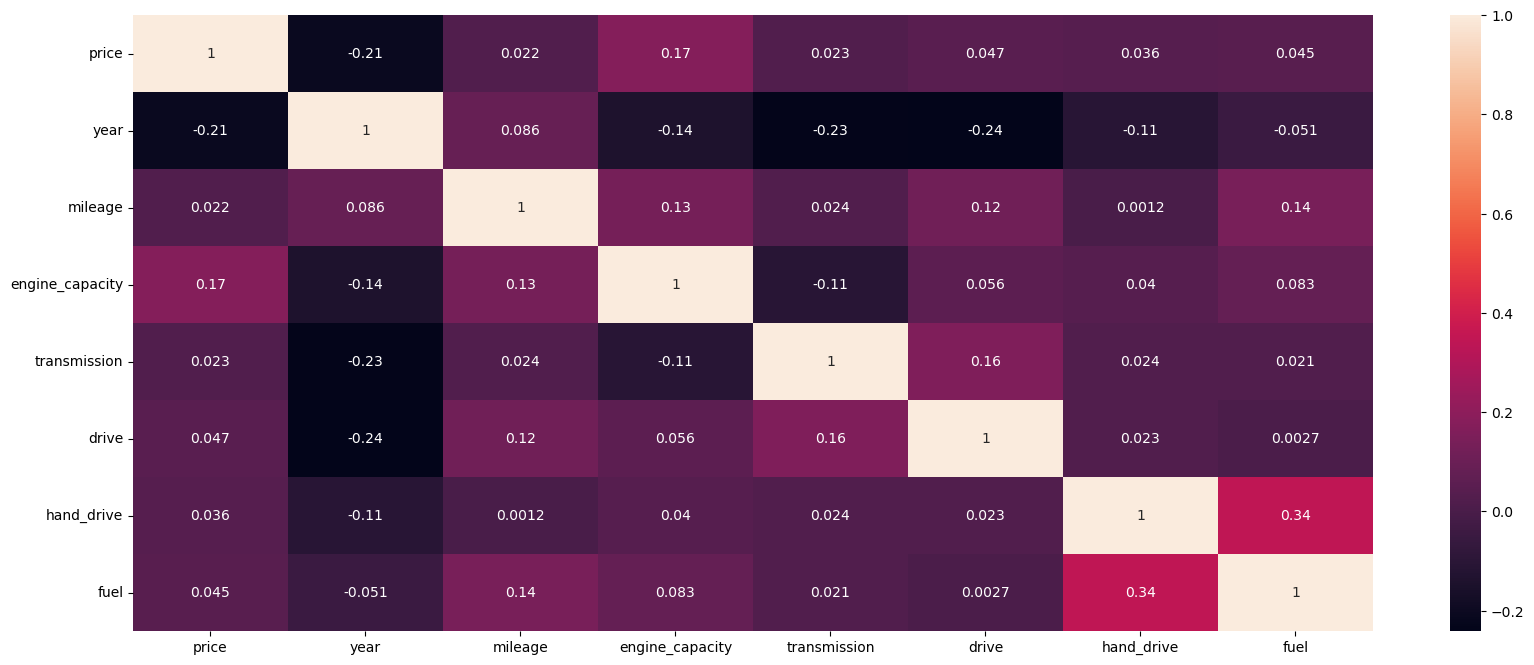

In [21]:
plt.figure(figsize=(20,8))
sns.heatmap(car.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='mileage', ylabel='price'>

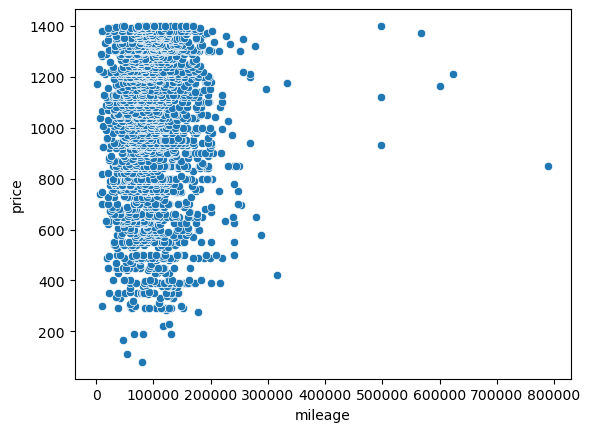

In [22]:
sns.scatterplot(x='mileage',y='price',data=car) 

<AxesSubplot:xlabel='engine_capacity', ylabel='price'>

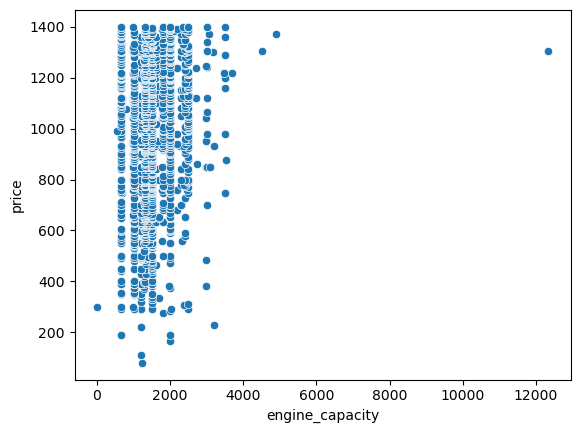

In [23]:
sns.scatterplot(x='engine_capacity',y='price',data=car) 

<AxesSubplot:xlabel='transmission', ylabel='price'>

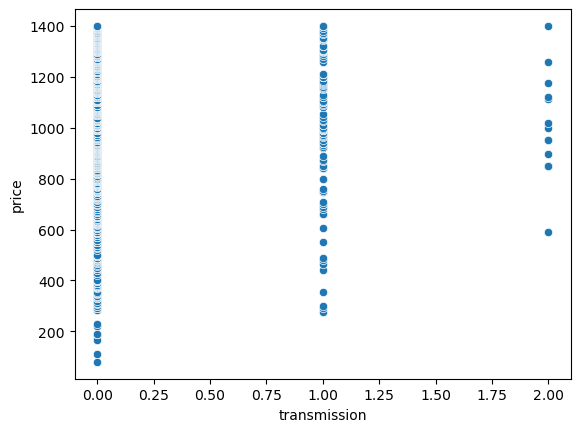

In [24]:
sns.scatterplot(x='transmission',y='price',data=car) 

<AxesSubplot:xlabel='drive', ylabel='price'>

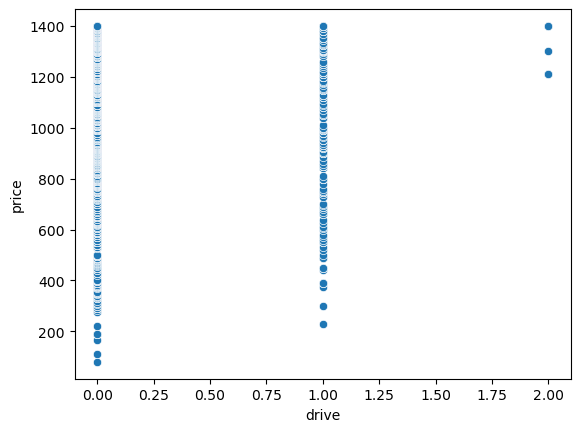

In [25]:
sns.scatterplot(x='drive',y='price',data=car) 

<AxesSubplot:xlabel='fuel', ylabel='price'>

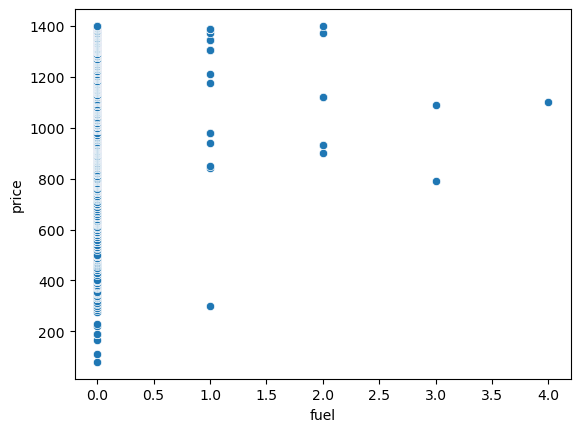

In [26]:
sns.scatterplot(x='fuel',y='price',data=car) 

<AxesSubplot:xlabel='hand_drive', ylabel='price'>

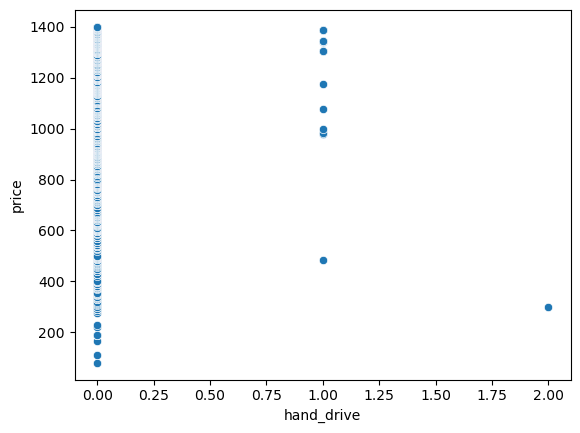

In [27]:
sns.scatterplot(x='hand_drive',y='price',data=car) 

price                 AxesSubplot(0.125,0.53;0.110714x0.35)
year               AxesSubplot(0.257857,0.53;0.110714x0.35)
mileage            AxesSubplot(0.390714,0.53;0.110714x0.35)
engine_capacity    AxesSubplot(0.523571,0.53;0.110714x0.35)
transmission       AxesSubplot(0.656429,0.53;0.110714x0.35)
drive              AxesSubplot(0.789286,0.53;0.110714x0.35)
hand_drive            AxesSubplot(0.125,0.11;0.110714x0.35)
fuel               AxesSubplot(0.257857,0.11;0.110714x0.35)
dtype: object

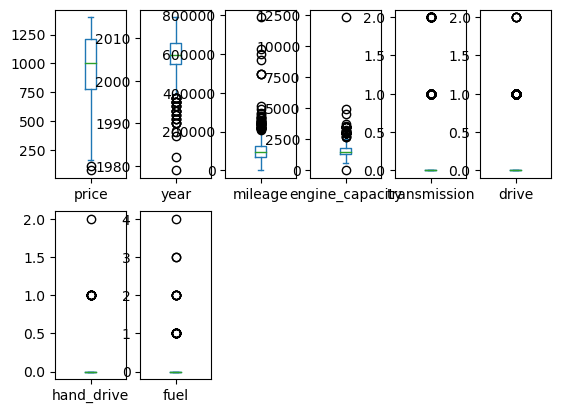

In [28]:
car.plot(kind="box",subplots=True,layout=(2,6))

In [29]:
from scipy.stats import zscore  ##to remove outliers

In [30]:
z=np.abs(zscore(car))

In [31]:
z

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,3.089012,0.803769,0.381195,0.485945,0.245919,0.300919,0.083893,0.097999
1,2.985066,1.089113,0.895470,0.558743,0.245919,0.300919,0.083893,0.097999
2,2.794498,0.262946,0.996610,0.897214,0.245919,0.300919,0.083893,0.097999
3,2.707876,0.548289,0.583755,0.879015,0.245919,0.300919,0.083893,0.097999
4,2.707876,0.007466,0.642142,1.541515,0.245919,0.300919,0.083893,0.097999
...,...,...,...,...,...,...,...,...
2313,1.484621,0.818701,0.399740,0.930012,0.245919,0.300919,0.083893,0.097999
2314,1.484621,0.803769,0.018796,2.717161,0.245919,0.300919,0.083893,0.097999
2315,1.484621,0.262946,0.018796,1.541515,6.195225,0.300919,0.083893,0.097999
2316,1.484621,1.615004,1.333053,1.541515,0.245919,3.152204,0.083893,0.097999


In [32]:
np.where(z>3)

(array([   0,    7,    7,   23,   23,   23,   23,   54,   75,   87,  103,
         111,  132,  134,  146,  160,  171,  186,  196,  198,  243,  246,
         247,  249,  253,  259,  268,  274,  291,  293,  309,  312,  314,
         334,  353,  359,  401,  404,  409,  416,  432,  441,  446,  456,
         485,  492,  495,  502,  503,  507,  507,  508,  529,  551,  580,
         594,  675,  681,  691,  693,  696,  700,  723,  724,  732,  738,
         739,  740,  741,  742,  743,  750,  751,  752,  753,  754,  765,
         771,  773,  775,  776,  777,  778,  781,  783,  785,  786,  789,
         801,  805,  806,  811,  818,  818,  820,  823,  834,  842,  842,
         854,  862,  866,  869,  877,  879,  883,  891,  908,  913,  926,
         927,  938,  941,  954,  956,  958,  970,  971,  971,  973,  979,
        1001, 1006, 1006, 1019, 1024, 1030, 1032, 1033, 1034, 1035, 1036,
        1065, 1066, 1078, 1079, 1080, 1080, 1083, 1084, 1084, 1091, 1091,
        1092, 1092, 1110, 1113, 1114, 

In [33]:
dfn=car[(z<3).all(axis=1)]

In [34]:
dfn.shape

(2028, 8)

##precentage of loss of data=(2318-2028)/2318*100=12.5 It is acceptable

# skewness Removal

In [35]:
car=dfn

In [36]:
car.skew().sort_values()

price             -0.448522
year              -0.111886
drive              0.000000
hand_drive         0.000000
fuel               0.000000
mileage            0.613009
engine_capacity    0.737042
transmission       5.660596
dtype: float64

we see transmission is above 3 so we remove this coloumn

In [37]:
features=['year','drive','hand_drive','fuel','mileage','engine_capacity']
label=['price']
x1=car[features]
y1=car[label]

In [38]:
x1

,year,drive,hand_drive,fuel,mileage,engine_capacity
1,2010,0,0,0,53000,1200
2,2005,0,0,0,47690,2000
3,2008,0,0,0,130661,1990
4,2006,0,0,0,66300,660
5,2004,0,0,0,81400,660
...,...,...,...,...,...,...
2311,2005,0,0,0,101874,2000
2312,2007,0,0,0,112000,1300
2313,2009,0,0,0,121000,996
2314,2003,0,0,0,101000,3000


In [39]:
y1

,price
1,110
2,165
3,190
4,190
5,190
...,...
2311,1400
2312,1400
2313,1400
2314,1400


In [40]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x1=sc.fit_transform(x1)

In [41]:
x1.mean()

0.2147324202691097

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [59]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.2, random_state=2)

In [60]:
print(x1.shape,x1_train.shape,x1_test.shape)

(2028, 6) (1622, 6) (406, 6)


In [46]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()

In [47]:
ln.fit(x1_train,y1_train)

LinearRegression()

In [48]:
predln=ln.predict(x1_train)

In [49]:
error_score=metrics.r2_score(y1_train,predln)
print("R squared Error:",error_score)

R squared Error: 0.08139930220017944


In [54]:
predln=ln.predict(x1_test)

In [55]:
error_score=metrics.r2_score(y1_test,predln)
print("R squared Error:",error_score)

R squared Error: 0.05739590163599806


In [66]:

from sklearn.tree import DecisionTreeClassifier

In [67]:
model2=DecisionTreeClassifier()

In [68]:
model2.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [70]:
model_2_train_pred=model2.predict(x1_train)

In [72]:
model_2_test_pred=model2.predict(x1_test)

In [73]:
print(classification_report(y1_train,model_2_train_pred))

              precision    recall  f1-score   support

         110       1.00      1.00      1.00         1
         165       1.00      1.00      1.00         1
         220       1.00      1.00      1.00         1
         275       1.00      1.00      1.00         1
         290       0.93      1.00      0.96        13
         300       1.00      1.00      1.00         2
         308       1.00      1.00      1.00         1
         310       1.00      1.00      1.00         1
         313       1.00      1.00      1.00         1
         320       1.00      1.00      1.00         1
         330       1.00      1.00      1.00         3
         336       1.00      1.00      1.00         1
         340       1.00      1.00      1.00         2
         345       1.00      1.00      1.00         1
         350       0.92      1.00      0.96        12
         355       1.00      1.00      1.00         2
         370       1.00      1.00      1.00         1
         375       1.00    

In [74]:
print(classification_report(y1_test,model_2_test_pred))

              precision    recall  f1-score   support

         190       0.00      0.00      0.00         3
         283       0.00      0.00      0.00         1
         290       0.00      0.00      0.00         0
         300       0.00      0.00      0.00         0
         320       0.00      0.00      0.00         0
         330       0.00      0.00      0.00         0
         340       0.00      0.00      0.00         0
         345       0.00      0.00      0.00         0
         350       0.00      0.00      0.00         2
         370       0.00      0.00      0.00         0
         375       1.00      1.00      1.00         1
         380       0.00      0.00      0.00         0
         390       0.50      0.09      0.15        11
         398       0.00      0.00      0.00         1
         400       0.00      0.00      0.00         1
         430       0.00      0.00      0.00         1
         448       0.00      0.00      0.00         1
         450       0.00    

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model3=RandomForestClassifier()

In [77]:
model3.fit(x1_train,y1_train)

RandomForestClassifier()

In [78]:
model_3_train_pred=model3.predict(x1_train)

In [79]:
model_3_test_pred=model3.predict(x1_test)

In [81]:
print(classification_report(y1_train,model_3_train_pred))

              precision    recall  f1-score   support

         110       1.00      1.00      1.00         1
         165       1.00      1.00      1.00         1
         220       1.00      1.00      1.00         1
         275       1.00      1.00      1.00         1
         290       1.00      0.92      0.96        13
         300       1.00      1.00      1.00         2
         308       1.00      1.00      1.00         1
         310       1.00      1.00      1.00         1
         313       1.00      1.00      1.00         1
         320       1.00      1.00      1.00         1
         330       1.00      1.00      1.00         3
         336       1.00      1.00      1.00         1
         340       1.00      1.00      1.00         2
         345       1.00      1.00      1.00         1
         350       0.92      1.00      0.96        12
         355       1.00      1.00      1.00         2
         370       1.00      1.00      1.00         1
         375       1.00    

In [82]:
print(classification_report(y1_test,model_3_test_pred))

              precision    recall  f1-score   support

         190       0.00      0.00      0.00         3
         283       0.00      0.00      0.00         1
         290       0.00      0.00      0.00         0
         300       0.00      0.00      0.00         0
         320       0.00      0.00      0.00         0
         330       0.00      0.00      0.00         0
         340       0.00      0.00      0.00         0
         345       0.00      0.00      0.00         0
         350       0.00      0.00      0.00         2
         370       0.00      0.00      0.00         0
         375       1.00      1.00      1.00         1
         380       0.00      0.00      0.00         0
         390       0.33      0.18      0.24        11
         398       0.00      0.00      0.00         1
         400       0.00      0.00      0.00         1
         430       0.00      0.00      0.00         1
         448       0.00      0.00      0.00         1
         450       0.00    